## My attempt to recreate twodim.m in python
This creates at two dimensional array, then does eof analysis of it.

 twodim.ipynb  Adapted by DL Hartmann from his earlier matlab code that worked better <br/>
 TWODIM.M    1/17/2005  <br/>
Let's make a two-dimensional data set to illustrate EOF analysis <br/>
Run this over and over again with the graphic window open and see <br/>
how little the eigenvectors move, even though the data are jumping all <br/>
over the place.  Increase and reduce the sample size.  <br/>
Vary the parameter c1 [ 1 -1 2 ] to change the slope of the cloud of points.<br/>


In [80]:
import os
import numpy as np
import matplotlib.pyplot as plt
#from scipy.io import netcdf
#from scipy.io import loadmat
#from scipy.interpolate import griddata
#import scipy.signal as sig
#import xarray as xr
#from cartopy import config
#import cartopy.crs as ccrs
#import pandas as pd
#import netCDF4 as nc
#import warnings
#from cartopy import config
#import matplotlib.ticker as mticker
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


x shape =  (2, 120)
[[-0.56004416 -0.82846275]
 [-0.82846275  0.56004416]]


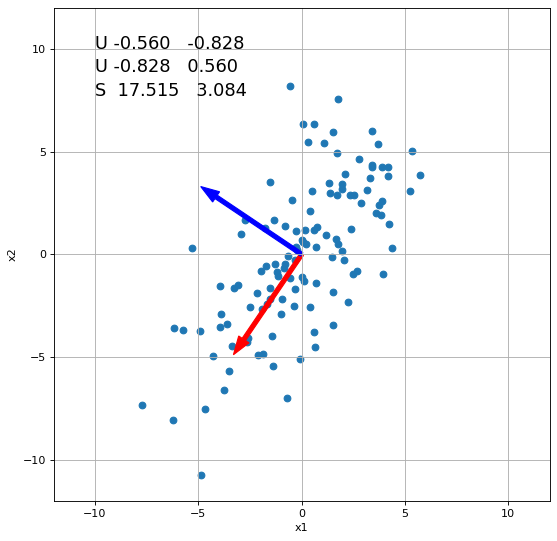

In [81]:
# twodim.ipynb  Adapted by DL Hartmann from his earlier matlab code that worked better
# TWODIM.M    1/17/2005
#Let's make a two-dimensional data set to illustrate EOF analysis
#Run this over and over again with the graphic window open and see
#how little the eigenvectors move, even though the data are jumping all
#over the place.  Increase and reduce the sample size.  
#Vary the parameter c1 [ 1 -1 2 ] to change the slope of the cloud of points.


#loop on time
# tap space bar to go to next set of data

#Set the sample size to num
num=120
#set the parameter controlling the amplitude of the first variable
a1=3.0
#set the parameter controlling the noise of the second variable
a2=3.0
#set the parameter scaling the second variable on the first:  the slope
c1=1.0
x = np.zeros((2,num))
print('x shape = ',np.shape(x))
plt.figure(figsize=(8,8),dpi=80)


iter = 1    # set the number of times you want to do this.  It plots over the top instead of starting over
# I would like to animate the figure by having it stay visible, but switch every second or on command to a
# new data set, but I have not been able to figure out how to do that, . . . yet.  Help?

for ii in range(iter):


    #Make data set
    for i in range(num):
        #  First number is Gaussian noise with an amplitude of a1
        x[0,i]=np.random.randn()*a1;
        #  Second number is the first times a slope c1,
        #  plus more noise of amplitude a2
        x[1,i]=c1*x[0,i]-np.random.randn()*a2;

    #Remove mean
    xm=x;

    xm[0,:]=x[0,:]-np.mean(x[0,:]);
    xm[1,:]=x[1,:]-np.mean(x[1,:]);


    #Compute covariance matrix
    c=np.matmul(xm,xm.T)/num;

    #do SVD of covariance matrix
    u, s, v = np.linalg.svd(c)
    print(u)
    
    plt.scatter(x[0,:],x[1:])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim([-12, 12])
    plt.ylim([-12, 12])
    #  write the eigenvectors on the plot
    plt.text(-10.,10.,'U '+ "%.3f" %u[0,0] + '   ' + "%.3f" %u[0,1] ,fontsize=16)
    plt.text(-10.,8.9 ,'U '+ "%.3f" %u[1,0] + '   ' + "%.3f" %u[1,1] ,fontsize=16)
    #  write the singular values on the plot
    plt.text(-10.,7.7,'S  '+ "%.3f" %s[0] + '   ' + "%.3f" %s[1] ,fontsize=16)
    #plt.text(-10.,6.8 , "%.3f" %s[1,0] + '   ' + "%.3f" %s[1,1] )
    #  indicate the singular vectors as arrows, make them 5x as long so we can see them
    plt.arrow(0.,0.,u[0,0]*5,u[0,1]*5,width=0.2,color='red')
    plt.arrow(0.,0.,u[1,0]*5,u[1,1]*5,width=0.2,color='blue')
    plt.grid()
    #plt.show()
    #input("Press Enter to continue...")
    #plt.clf()